In [1]:
# 数据预处理：
# 1.读取图像文件
# 2.将jpg文件解码为RGB的像素网格
# 3.将这些像素网格转换为浮点张量
# 4.将像素值0-255 缩放到0-1

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ImageDataGenerator??

In [4]:
# 将所有的图片缩放到 0-1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_dir = "D:\\project\\tensorflow\\python_and_dl\\data\\dogs-vs-cats\\cats_and_dogs_small\\train\\"
validation_dir = "D:\\project\\tensorflow\\python_and_dl\\data\\dogs-vs-cats\\cats_and_dogs_small\\validation\\"
test_dir = "D:\\project\\tensorflow\\python_and_dl\\data\\dogs-vs-cats\\cats_and_dogs_small\\test\\"

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# 构建NN模型

In [8]:
from keras import layers
from keras import models

In [9]:
model = models.Sequential()

In [10]:
model.add(layers.Conv2D(32, (2, 2), input_shape=(150, 150, 3), activation='relu'))

In [11]:
model.add(layers.MaxPooling2D((2, 2)))

In [12]:
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

In [13]:
model.add(layers.MaxPooling2D((2, 2)))

In [14]:
model.add(layers.Conv2D(128, (2, 2), activation='relu'))

In [15]:
model.add(layers.MaxPooling2D(2, 2))

In [16]:
model.add(layers.Conv2D(128, (2, 2), activation='relu'))

In [17]:
model.add(layers.MaxPooling2D(2, 2))

In [18]:
model.add(layers.Flatten())

In [19]:
model.add(layers.Dense(512, activation='relu'))

In [20]:
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       65664     
__________

In [22]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [23]:
model.fit_generator(train_generator, steps_per_epoch=100, epochs=1, validation_data=validation_generator, validation_steps=1)

Epoch 1/1
100/100 [==============================] - 85s 850ms/step - loss: 0.7546 - acc: 0.5080 - val_loss: 0.6616 - val_acc: 0.6000


In [24]:
# data argumentation 数据增强 预处理图像

In [26]:
train_cats_dir = "D:\\project\\tensorflow\\python_and_dl\\data\\dogs-vs-cats\\cats_and_dogs_small\\train\\cats\\"

In [29]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)[:10]]

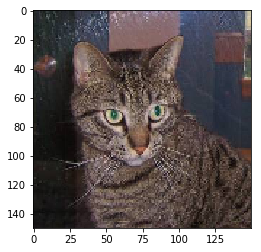

In [43]:
datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
)
img = image.load_img(fnames[1], target_size=(150, 150))
plt.imshow(img)
plt.figure()
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

In [42]:
x.shape

(1, 150, 150, 3)

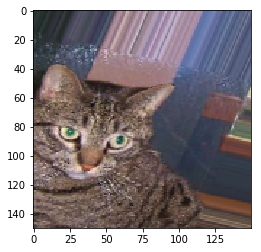

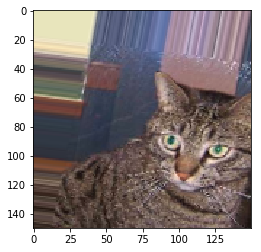

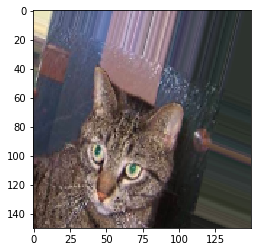

In [51]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.imshow(image.array_to_img(batch[0]))
    plt.figure(i)
    i += 1
    if i % 4 ==0:
        break